In [1]:
import numpy as np
import pandas as pd

In [2]:
from matplotlib import pyplot as plt
plt.style.use('seaborn-whitegrid')

In [3]:
from sklearn.preprocessing import MinMaxScaler
from keras.datasets import mnist
(train_x, train_y), (test_x, test_y) = mnist.load_data()

print (train_x.shape)
print (test_x.shape)
print (train_y.shape)
print (test_y.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [4]:
train_x = train_x.reshape((len(train_x), np.prod(train_x.shape[1:])))
test_x = test_x.reshape((len(test_x), np.prod(test_x.shape[1:])))

print (train_x.shape)
print (test_x.shape)

(60000, 784)
(10000, 784)


In [5]:
scaler = MinMaxScaler()
train_x = scaler.fit_transform(train_x) # train_x.astype('float32') / 255.
test_x = scaler.fit_transform(test_x) # test_x = test_x.astype('float32') / 255.

print (train_x.shape)
print (test_x.shape)

(60000, 784)
(10000, 784)


In [6]:
train_x = train_x[:6000]
test_x = test_x[:1000]

train_y = train_y[:6000]
test_y = test_y[:1000]

print (train_x.shape)
print (train_y.shape)
print (test_x.shape)
print (test_y.shape)

(6000, 784)
(6000,)
(1000, 784)
(1000,)


In [7]:
df_train_x = pd.DataFrame(train_x)
df_test_x = pd.DataFrame(test_x)

df_train_y = pd.DataFrame(data=train_y, columns=['class'])
df_test_y = pd.DataFrame(data=test_y, columns=['class'])

In [8]:
df_train = pd.concat([df_train_y, df_train_x], axis=1)
df_test = pd.concat([df_test_y, df_test_x], axis=1)

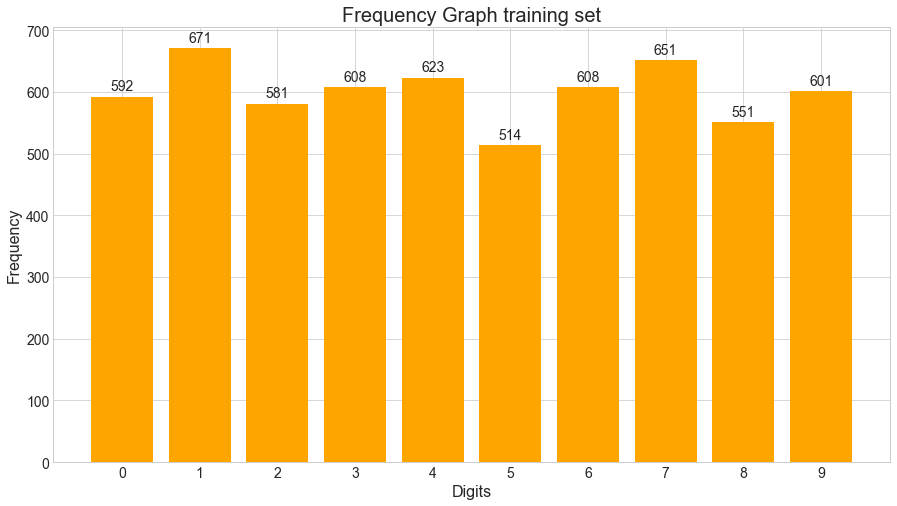

In [9]:
counts = df_train.groupby('class')['class'].count()

# counts
fig = plt.figure(figsize=(15, 8))
fig.add_subplot(111)

plt.bar(counts.index, counts.values, width=0.8, color='orange')
for i in counts.index:
    plt.text(i, counts.values[i] + 10, str(counts.values[i]),
             horizontalalignment='center', fontsize=14)

plt.tick_params(labelsize=14)
plt.xticks(counts.index)
plt.xlabel('Digits', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.title('Frequency Graph training set', fontsize=20)
plt.show()

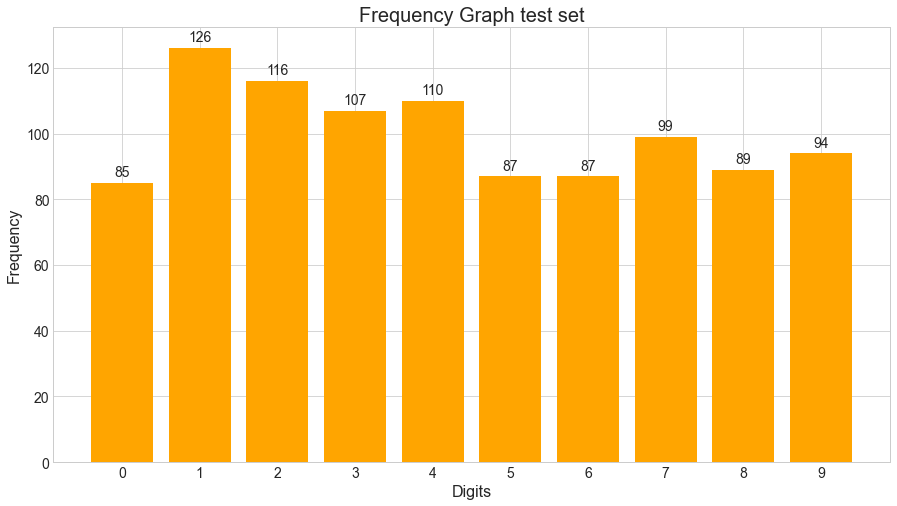

In [10]:
counts = df_test.groupby('class')['class'].count()

fig = plt.figure(figsize=(15, 8))
fig.add_subplot(111)

plt.bar(counts.index, counts.values, width=0.8, color='orange')
for i in counts.index:
    plt.text(i, counts.values[i] + 2, str(counts.values[i]),
             horizontalalignment='center', fontsize=14)

plt.tick_params(labelsize=14)
plt.xticks(counts.index)
plt.xlabel('Digits', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.title('Frequency Graph test set', fontsize=20)
plt.show()

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

In [12]:
rf = RandomForestClassifier(n_estimators=80, max_depth=10).fit(df_train_x, df_train_y)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


In [13]:
pred = rf.predict(df_test_x)

print ('Classification Report\n')
print(classification_report(df_test_y, pred))

confusion_matrix = np.zeros([10, 10])
for i in range(df_test_x.shape[0]):
    confusion_matrix[df_test_y.iloc[i], pred[i]] += 1

Classification Report

              precision    recall  f1-score   support

           0       0.95      0.99      0.97        85
           1       0.99      0.98      0.98       126
           2       0.91      0.88      0.89       116
           3       0.89      0.90      0.89       107
           4       0.89      0.87      0.88       110
           5       0.93      0.91      0.92        87
           6       0.91      0.93      0.92        87
           7       0.93      0.88      0.90        99
           8       0.85      0.81      0.83        89
           9       0.80      0.91      0.86        94

    accuracy                           0.91      1000
   macro avg       0.91      0.91      0.90      1000
weighted avg       0.91      0.91      0.91      1000



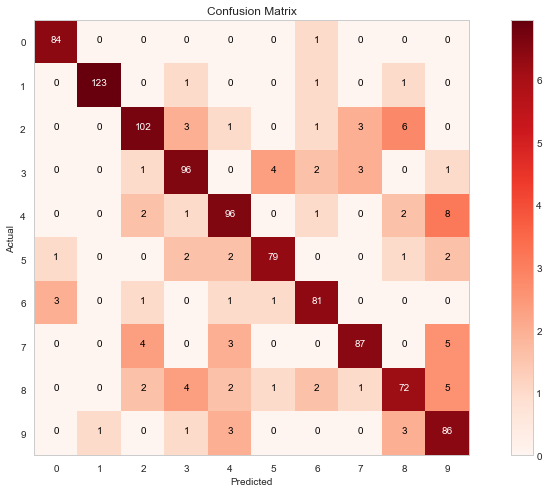

In [14]:
fig = plt.figure(figsize=(15, 8))
fig.add_subplot(111)

labels = [i for i in range(10)]
plt.imshow(np.log2(confusion_matrix + 1), cmap='Reds')
plt.colorbar()
plt.tick_params(size=5, color='white')
plt.xticks(np.arange(0, 10), labels)
plt.yticks(np.arange(0, 10), labels)

threshold = confusion_matrix.max() / 2 

for i in range(10):
    for j in range(10):
        plt.text(j, i, int(confusion_matrix[i, j]), horizontalalignment='center',
                 color='white' if confusion_matrix[i, j] > threshold else 'black')
        
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.grid(False)
plt.show()

In [15]:
df_x = pd.concat([df_train_x, df_test_x])
df_y = pd.concat([df_train_y, df_test_y])

score = cross_val_score(rf, df_x, df_y)

print(np.mean(score))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

0.9277142857142857
